In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, auc

In [2]:
# Definindo estilo
sb.set_style("darkgrid")

In [3]:
# Importando base de dados
data = pd.read_csv('dados/train.csv')
test = pd.read_csv('dados/test.csv')

## Verificando informações do dataset

In [4]:
data.head().style.background_gradient(cmap = 'viridis')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Análisando features

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.corr()

/var/folders/nm/vld9byk130bb28cb7q9fs82c0000gn/T/ipykernel_15589/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


/var/folders/nm/vld9byk130bb28cb7q9fs82c0000gn/T/ipykernel_15589/2318825357.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(), annot = True, cmap = 'Blues',  annot_kws = {"size": 12})


<AxesSubplot: >

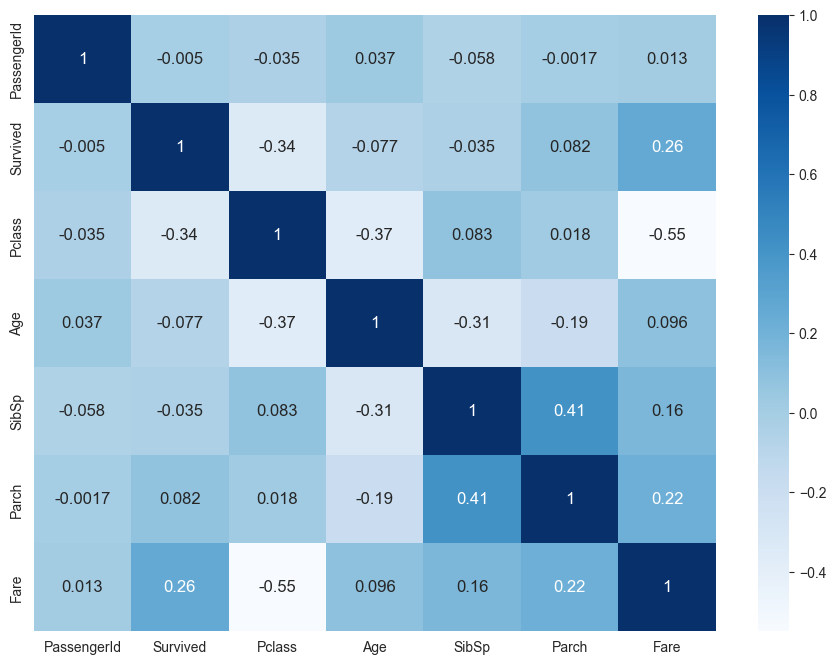

In [9]:
plt.subplots(figsize = (11, 8))
sb.heatmap(data.corr(), annot = True, cmap = 'Blues',  annot_kws = {"size": 12})

In [10]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data.Sex.value_counts(normalize = True) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [12]:
data.loc[data.Sex == 'female', 'Survived'].value_counts() / data.shape[0] * 100

1    26.150393
0     9.090909
Name: Survived, dtype: float64

In [13]:
data.loc[data.Sex == 'male', 'Survived'].value_counts() / data.shape[0] * 100

0    52.525253
1    12.233446
Name: Survived, dtype: float64

In [14]:
sb.countplot(data.Sex).set_title('Sexo')
plt.xlabel('Sex')
plt.ylabel('Frequência')
plt.show()

ValueError: could not convert string to float: 'male'

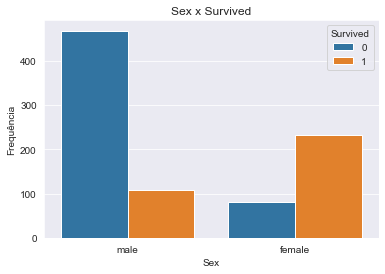

In [ ]:
sb.countplot(data.Sex, hue = data.Survived).set_title('Sex x Survived')
plt.xlabel('Sex')
plt.ylabel('Frequência')
plt.show()

In [ ]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
data.Pclass.value_counts() / data.shape[0] * 100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data.Embarked.value_counts() / data.shape[0] * 100

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

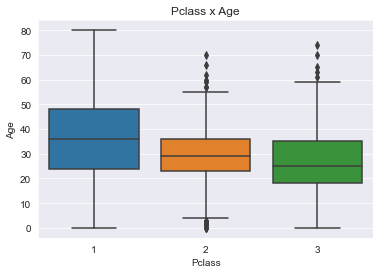

In [ ]:
sb.boxplot(x = data.Pclass, y = data.Age).set_title('Pclass x Age')
plt.show()

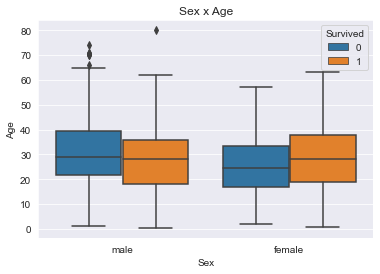

In [ ]:
sb.boxplot(x = data.Sex, y = data.Age, hue = data.Survived).set_title('Sex x Age')
plt.show()

## Realisando tratamento dos dados

### Dados de treino

In [ ]:
# Retirando dados não relevantes
# data.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
# Verificando valores nulos
data.isnull().sum().sort_values(ascending = True)

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Age         177
dtype: int64

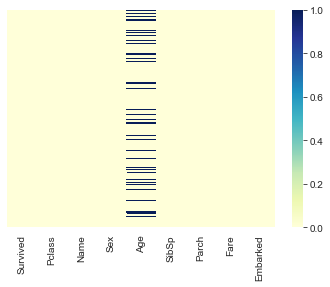

In [ ]:
sb.heatmap(data.isnull(), cmap = "YlGnBu", yticklabels = False)

In [ ]:
# Tratando valores nulos
data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data['Embarked'].fillna('S', inplace = True)

In [ ]:
agem = data.groupby(['Sex', 'Pclass', 'Embarked', 'Survived']).agg({'Age': 'mean'}).values

In [ ]:
dados_treino = [data]

for x in dados_treino:
    is_null = x['Age'].isnull().sum()
    rand_age = np.random.randint(agem.min(), agem.max(), size = is_null)
    age_slice = x['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    x['Age'] = age_slice
    x['Age'] = data['Age'].astype(int)

In [ ]:
# Categorical encoding
# One-Hot Encoding
data = pd.get_dummies(data = data, columns = ['Sex', 'Embarked'])

In [ ]:
data.Name.str.extract(' ([A-Za-z]+)\.', expand = False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Capt          1
Sir           1
Ms            1
Mme           1
Lady          1
Jonkheer      1
Don           1
Name: Name, dtype: int64

In [ ]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "HighClass": 5}

for x1 in [data]:
    # extract titles
    x1['Name'] = x1.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    # replace titles with a more common title or as Rare
    x1['Name'] = x1['Name'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'HighClass')
    x1['Name'] = x1['Name'].replace('Mlle', 'Miss')
    x1['Name'] = x1['Name'].replace('Ms', 'Miss')
    x1['Name'] = x1['Name'].replace('Mme', 'Mrs')
    # convert titles into numbers
    x1['Name'] = x1['Name'].map(titles)

### Dados de validação

In [ ]:
# Retirando dados não relevantes
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
# Verificando valores nulos
test.isnull().sum().sort_values(ascending = True)

Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
Fare         1
Age         86
dtype: int64

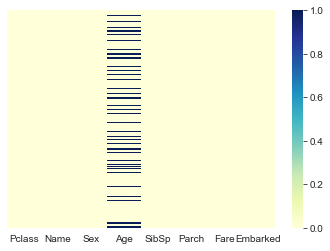

In [ ]:
sb.heatmap(test.isnull(), cmap = "YlGnBu", yticklabels = False)

In [ ]:
test['Fare'].fillna(test.Fare.mode()[0], inplace = True)


In [ ]:
dados_teste = [test]

for y in dados_teste:
    is_null = y['Age'].isnull().sum()
    rand_age = np.random.randint(agem.min(), agem.max(), size = is_null)
    age_slice = y['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    y['Age'] = age_slice
    y['Age'] = data['Age'].astype(int)

In [ ]:
# Categorical encoding
# One-Hot Encoding
test = pd.get_dummies(data = test, columns = ['Sex', 'Embarked'])

## Separando dados de treino, teste


In [ ]:
# Separando features e target
preditos = data.drop('Survived', axis = 1)
classe = data.iloc[:, 0].values

# Dividindo base entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(preditos, classe, test_size = 0.3, random_state = 0)

## Criando Modelo

![Image of Yaktocat](https://media.giphy.com/media/NXp9HM6YeuS0U/giphy.gif)

### Gradient Boostingde

In [ ]:
# Criando modelo Gradient Boostingde
modelo = GradientBoostingClassifier()
modelo.fit(X_train, y_train)

# Testando modelo
previsoes = modelo.predict(X_test)

## Avaliando Modelo

![Image of Yaktocat](https://media.giphy.com/media/xT1R9CiGfTSbhpqFZS/giphy.gif)

### Cross Validation

In [ ]:
# Executa Cross Validation com 5 Folds
ckf = cross_val_score(modelo, preditos, classe, cv = 5, scoring = 'accuracy')
ckf

array([0.83798883, 0.79213483, 0.83146067, 0.79213483, 0.83707865])

In [ ]:
# Gerando matriz de confusão
confusao = confusion_matrix(y_test, previsoes)
confusao

array([[150,  18],
       [ 29,  71]])

In [ ]:
# Verificando taxa de acerto
taxa_acerto = round(accuracy_score(y_test, previsoes) * 100, 2)
taxa_acerto

85.07

In [ ]:
modelo.score(X_train, y_train)

0.9101123595505618

In [ ]:
print(classification_report(y_test, previsoes))

precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.80      0.71      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
auc_roc = roc_auc_score(y_test, previsoes)
auc_roc

0.8242857142857143

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, previsoes)
roc_auc = auc(fpr, tpr)
roc_auc

0.8242857142857143

Text(0.5, 0, 'False Positive Rate')

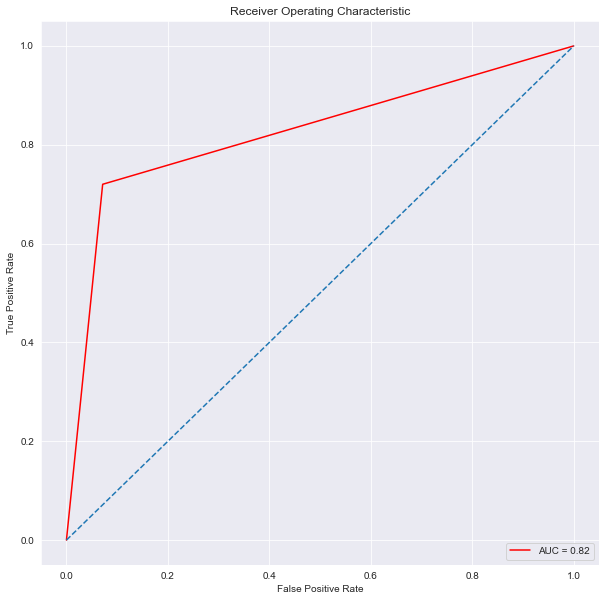

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Submission

In [ ]:
# Gerando arquivo para envio Kaggle
submission = pd.DataFrame()
submission['PassengerId'] = list(range(892, 1310))
submission['Survived'] = modelo.predict(test)
submission.to_csv('submission.csv', index = False)